In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as img
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

import seaborn as sns
sns.set(font="Malgun Gothic",rc={"axes.unicode_minus":False},
       style="darkgrid")

import cv2 as cv

import os

import glob

from openpyxl import load_workbook

from datetime import datetime

In [3]:
df=pd.read_csv("c:/data/dacon/total_merge.csv")


,시간,내부온도관측치,외부온도관측치,내부습도관측치,외부습도관측치,CO2관측치,EC관측치,최근분무량,화이트 LED동작강도,레드 LED동작강도,...,냉방부하,난방온도,난방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량,case,이미지면적,무게
0,2021-05-28 02:46,22.600000,21.299999,78.199997,54.0,597.0,0.0,126.0,0.0,0.0,...,8.000002,20.0,0.0,0.0,0.0,0.0,0.0,CASE75,117248.0,210.872
1,2021-05-28 02:47,22.600000,21.400000,79.099998,54.0,598.0,0.0,126.0,0.0,0.0,...,8.000002,20.0,0.0,0.0,0.0,0.0,0.0,CASE75,117248.0,210.872
2,2021-05-28 02:48,22.700001,21.400000,79.599998,54.0,607.0,0.0,126.0,0.0,0.0,...,8.500004,20.0,0.0,0.0,0.0,0.0,0.0,CASE75,117248.0,210.872
3,2021-05-28 02:49,22.700001,21.299999,79.900002,54.0,608.0,0.0,126.0,0.0,0.0,...,8.500004,20.0,0.0,0.0,0.0,0.0,0.0,CASE75,117248.0,210.872
4,2021-05-28 02:50,22.700001,21.400000,80.300003,54.0,610.0,0.0,126.0,0.0,0.0,...,8.500004,20.0,0.0,0.0,0.0,0.0,0.0,CASE75,117248.0,210.872
5,2021-05-28 02:51,22.700001,21.299999,80.599998,54.0,609.0,0.0,126.0,0.0,0.0,...,8.500004,20.0,0.0,0.0,0.0,0.0,0.0,CASE75,117248.0,210.872
6,2021-05-28 02:52,22.700001,21.299999,81.000000,54.0,612.0,0.0,126.0,0.0,0.0,...,8.500004,20.0,0.0,0.0,0.0,0.0,0.0,CASE75,117248.0,210.872
7,2021-05-28 02:53,22.799999,21.299999,81.699997,54.0,612.0,0.0,126.0,0.0,NaN,...,8.500004,20.0,0.0,0.0,0.0,0.0,0.0,CASE75,117248.0,210.872
8,2021-05-28 02:54,22.600000,21.400000,82.599998,54.0,613.0,0.0,126.0,0.0,0.0,...,8.999996,20.0,0.0,0.0,0.0,0.0,0.0,CASE75,117248.0,210.872
9,2021-05-28 02:55,22.700001,21.299999,82.900002,54.0,614.0,0.0,126.0,0.0,0.0,...,8.000002,20.0,0.0,0.0,0.0,0.0,0.0,CASE75,117248.0,210.872


In [4]:
df

,시간,내부온도관측치,외부온도관측치,내부습도관측치,외부습도관측치,CO2관측치,EC관측치,최근분무량,화이트 LED동작강도,레드 LED동작강도,...,냉방부하,난방온도,난방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량,case,이미지면적,무게
0,2021-05-28 02:46,22.600000,21.299999,78.199997,54.000000,597.0,0.0,126.0,0.0,0.0,...,8.000002,20.0,0.0,0.0,0.0,0.0,0.0,CASE75,117248.0,210.872
1,2021-05-28 02:47,22.600000,21.400000,79.099998,54.000000,598.0,0.0,126.0,0.0,0.0,...,8.000002,20.0,0.0,0.0,0.0,0.0,0.0,CASE75,117248.0,210.872
2,2021-05-28 02:48,22.700001,21.400000,79.599998,54.000000,607.0,0.0,126.0,0.0,0.0,...,8.500004,20.0,0.0,0.0,0.0,0.0,0.0,CASE75,117248.0,210.872
3,2021-05-28 02:49,22.700001,21.299999,79.900002,54.000000,608.0,0.0,126.0,0.0,0.0,...,8.500004,20.0,0.0,0.0,0.0,0.0,0.0,CASE75,117248.0,210.872
4,2021-05-28 02:50,22.700001,21.400000,80.300003,54.000000,610.0,0.0,126.0,0.0,0.0,...,8.500004,20.0,0.0,0.0,0.0,0.0,0.0,CASE75,117248.0,210.872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295355,2021-05-30 02:41,22.100000,21.900000,75.000000,52.599998,593.0,0.0,0.0,0.0,0.0,...,5.500002,20.0,0.0,0.0,0.0,0.0,0.0,CASE75,121913.5,209.824
2295356,2021-05-30 02:42,22.000000,21.900000,75.500000,52.700001,594.0,0.0,0.0,0.0,0.0,...,5.000000,20.0,0.0,0.0,0.0,0.0,0.0,CASE75,121913.5,209.824
2295357,2021-05-30 02:43,22.200001,21.900000,77.099998,52.799999,595.0,0.0,0.0,0.0,0.0,...,5.000000,20.0,0.0,0.0,0.0,0.0,0.0,CASE75,121913.5,209.824
2295358,2021-05-30 02:44,22.200001,21.900000,78.400002,52.799999,600.0,0.0,0.0,0.0,0.0,...,6.000004,20.0,0.0,0.0,0.0,0.0,0.0,CASE75,121913.5,209.824


In [124]:
# 시간 -> 월일 컬럼, case-> case_idx
df['월일']=df['시간'].str[5:10]
df['case_idx']=pd.to_numeric(df['case'].str[4:6])
df.head(5)

,시간,내부온도관측치,외부온도관측치,내부습도관측치,외부습도관측치,CO2관측치,EC관측치,최근분무량,화이트 LED동작강도,레드 LED동작강도,...,난방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량,case,이미지면적,무게,월일,case_idx
0,2021-05-28 02:46,22.600000,21.299999,78.199997,54.0,597.0,0.0,126.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,CASE75,117248.0,210.872,05-28,75
1,2021-05-28 02:47,22.600000,21.400000,79.099998,54.0,598.0,0.0,126.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,CASE75,117248.0,210.872,05-28,75
2,2021-05-28 02:48,22.700001,21.400000,79.599998,54.0,607.0,0.0,126.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,CASE75,117248.0,210.872,05-28,75
3,2021-05-28 02:49,22.700001,21.299999,79.900002,54.0,608.0,0.0,126.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,CASE75,117248.0,210.872,05-28,75
4,2021-05-28 02:50,22.700001,21.400000,80.300003,54.0,610.0,0.0,126.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,CASE75,117248.0,210.872,05-28,75


In [125]:
# 시간, case 컬럼 제거
df.drop(['시간','case'],axis=1,inplace=True)
df.head(5)

,내부온도관측치,외부온도관측치,내부습도관측치,외부습도관측치,CO2관측치,EC관측치,최근분무량,화이트 LED동작강도,레드 LED동작강도,블루 LED동작강도,...,난방온도,난방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량,이미지면적,무게,월일,case_idx
0,22.600000,21.299999,78.199997,54.0,597.0,0.0,126.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,117248.0,210.872,05-28,75
1,22.600000,21.400000,79.099998,54.0,598.0,0.0,126.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,117248.0,210.872,05-28,75
2,22.700001,21.400000,79.599998,54.0,607.0,0.0,126.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,117248.0,210.872,05-28,75
3,22.700001,21.299999,79.900002,54.0,608.0,0.0,126.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,117248.0,210.872,05-28,75
4,22.700001,21.400000,80.300003,54.0,610.0,0.0,126.0,0.0,0.0,NaN,...,20.0,0.0,0.0,0.0,0.0,0.0,117248.0,210.872,05-28,75


In [126]:
# meta 없는 case 제거
df_1=df.groupby("case_idx").max()
idx_notnull=df_1[df_1['최근분무량'].notnull()].index
# print(idx_notnull)
# len(idx_notnull)
df_1=df[df['case_idx'].isin(idx_notnull)]
df_1.head(5)

,내부온도관측치,외부온도관측치,내부습도관측치,외부습도관측치,CO2관측치,EC관측치,최근분무량,화이트 LED동작강도,레드 LED동작강도,블루 LED동작강도,...,난방온도,난방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량,이미지면적,무게,월일,case_idx
0,22.600000,21.299999,78.199997,54.0,597.0,0.0,126.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,117248.0,210.872,05-28,75
1,22.600000,21.400000,79.099998,54.0,598.0,0.0,126.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,117248.0,210.872,05-28,75
2,22.700001,21.400000,79.599998,54.0,607.0,0.0,126.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,117248.0,210.872,05-28,75
3,22.700001,21.299999,79.900002,54.0,608.0,0.0,126.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,117248.0,210.872,05-28,75
4,22.700001,21.400000,80.300003,54.0,610.0,0.0,126.0,0.0,0.0,NaN,...,20.0,0.0,0.0,0.0,0.0,0.0,117248.0,210.872,05-28,75


In [127]:
# case_idx, 월일 별 mean
df_2=df_1.groupby(['월일','case_idx']).mean()
df_2=df_2.reset_index()
df_2=df_2.sort_values(['case_idx','월일'])
df_2=df_2.reset_index()
df_2.drop('index',axis=1,inplace=True)
df_2.head()

,월일,case_idx,내부온도관측치,외부온도관측치,내부습도관측치,외부습도관측치,CO2관측치,EC관측치,최근분무량,화이트 LED동작강도,...,냉방온도,냉방부하,난방온도,난방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량,이미지면적,무게
0,05-07,1,22.809498,43.402276,77.435950,5.352071,475.723705,20.044034,0.0,200.672104,...,17.861656,202.837487,19.356107,10.363331,164.957756,14.009672,23.870059,NaN,30803.000000,49.193000
1,05-08,1,22.962222,43.638194,77.654236,4.840069,478.774306,20.661806,0.0,200.856836,...,17.414777,179.413149,18.852110,13.461307,145.929643,12.389964,21.093542,NaN,36825.746528,58.545399
2,05-09,1,22.926528,40.362361,77.490139,4.615646,485.095139,20.682222,0.0,200.856120,...,17.417408,179.554817,18.854995,13.325044,146.041083,12.375941,21.137793,NaN,43926.531944,70.774368
3,05-10,1,21.050139,56.355903,79.911042,4.006066,488.493056,18.266180,0.0,200.422495,...,17.416580,179.504056,18.854097,7.632850,146.006121,12.370097,21.127837,NaN,51824.181250,84.177522
4,05-11,1,21.818680,67.788264,81.271111,4.686528,483.207639,19.295069,0.0,200.422302,...,17.417364,179.523273,18.854948,10.663438,145.999566,12.396976,21.126731,NaN,59297.368056,100.600333


In [128]:
# dfs에 리스트 형태로 case_idx 별로 넣기
dfs=[]
case_idx_fac=df_2['case_idx'].drop_duplicates()
# print(case_idx_fac)

for i in case_idx_fac:
    dff=df_2[df_2['case_idx']==i]
    dfs.append(dff)
    
dfs

[      월일  case_idx    내부온도관측치    외부온도관측치    내부습도관측치   외부습도관측치      CO2관측치  \
 0  05-07         1  22.809498  43.402276  77.435950  5.352071  475.723705   
 1  05-08         1  22.962222  43.638194  77.654236  4.840069  478.774306   
 2  05-09         1  22.926528  40.362361  77.490139  4.615646  485.095139   
 3  05-10         1  21.050139  56.355903  79.911042  4.006066  488.493056   
 4  05-11         1  21.818680  67.788264  81.271111  4.686528  483.207639   
 5  05-12         1  24.183530  49.492639  80.160069  4.404032  493.477778   
 6  05-13         1  24.390278  56.534792  81.455278  4.811170  512.700694   
 7  05-14         1  24.510146  60.539750  82.282071  4.916157  513.592773   
 8  05-15         1  25.097708  75.285347  83.300764  3.680907  505.027778   
 9  05-16         1  23.639394  87.802424  85.640606  3.000000  549.193939   
 
        EC관측치  최근분무량  화이트 LED동작강도  ...       냉방온도        냉방부하       난방온도  \
 0  20.044034    0.0   200.672104  ...  17.861656  202.837487  1

In [131]:
# case_idx 별로 area_gap 구하기

for k in range(len(dfs)):
    
    dfs[k]=dfs[k].reset_index()
    dfs[k].drop('index',axis=1,inplace=True)
    area=dfs[k]['이미지면적']
    area_gap=[]
    
    for i in range(len(area)-1):
        x=(area[i+1]-area[i])
        area_gap.append(x)
    
    area_gap.append(0)
    dfs[k]['area_gap']=area_gap

dfs


[      월일  case_idx    내부온도관측치    외부온도관측치    내부습도관측치   외부습도관측치      CO2관측치  \
 0  05-07         1  22.809498  43.402276  77.435950  5.352071  475.723705   
 1  05-08         1  22.962222  43.638194  77.654236  4.840069  478.774306   
 2  05-09         1  22.926528  40.362361  77.490139  4.615646  485.095139   
 3  05-10         1  21.050139  56.355903  79.911042  4.006066  488.493056   
 4  05-11         1  21.818680  67.788264  81.271111  4.686528  483.207639   
 5  05-12         1  24.183530  49.492639  80.160069  4.404032  493.477778   
 6  05-13         1  24.390278  56.534792  81.455278  4.811170  512.700694   
 7  05-14         1  24.510146  60.539750  82.282071  4.916157  513.592773   
 8  05-15         1  25.097708  75.285347  83.300764  3.680907  505.027778   
 9  05-16         1  23.639394  87.802424  85.640606  3.000000  549.193939   
 
        EC관측치  최근분무량  화이트 LED동작강도  ...        냉방부하       난방온도       난방부하  \
 0  20.044034    0.0   200.672104  ...  202.837487  19.356107  1

In [145]:
# dfs에 나누어진 case_idx 별 df 다시 합치기
result = pd.concat(dfs, ignore_index=True)
result['인덱스']=range(1401)
result.set_index('인덱스',drop=True,append=True,inplace=True)
result.to_csv("c:/data/dacon/result_area_gap.csv" , index = True)
result.info

<bound method DataFrame.info of               월일  case_idx    내부온도관측치    외부온도관측치    내부습도관측치    외부습도관측치  \
     인덱스                                                                 
0    0     05-07         1  22.809498  43.402276  77.435950   5.352071   
1    1     05-08         1  22.962222  43.638194  77.654236   4.840069   
2    2     05-09         1  22.926528  40.362361  77.490139   4.615646   
3    3     05-10         1  21.050139  56.355903  79.911042   4.006066   
4    4     05-11         1  21.818680  67.788264  81.271111   4.686528   
...          ...       ...        ...        ...        ...        ...   
1396 1396  05-25        74  25.131202  22.712648  78.936439  48.412370   
1397 1397  05-26        74  22.837952  22.172289  80.016867  49.760241   
1398 1398  05-28        75  25.185636  22.178807  79.977787  56.956593   
1399 1399  05-29        75  24.999861  22.201876  79.958304  55.506532   
1400 1400  05-30        75  22.831325  22.123494  80.312650  52.866265   

     

In [133]:
result['area_gap'].mean()

4315.2516059957115

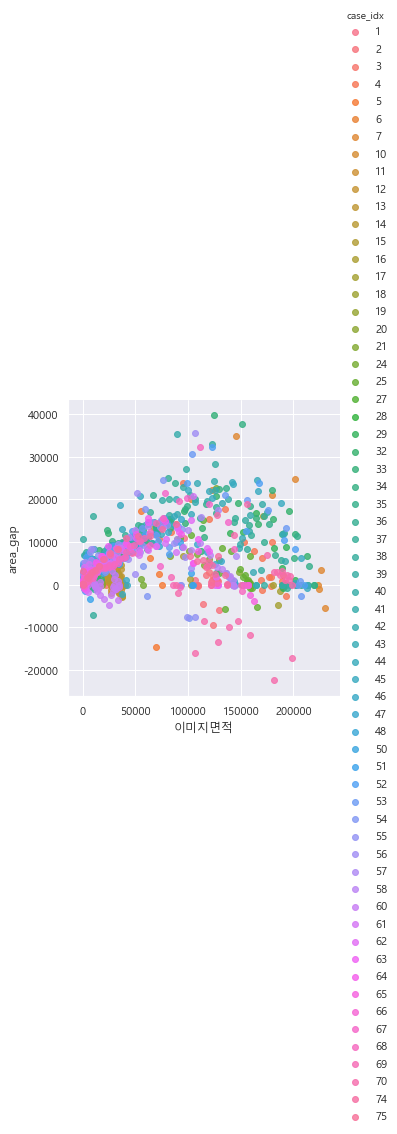

In [134]:
# x= 이미지 면적 y= weight_gap
sns.lmplot(x='이미지면적', y='area_gap',data=result, fit_reg=False,hue='case_idx') 
 # 군집화?? 

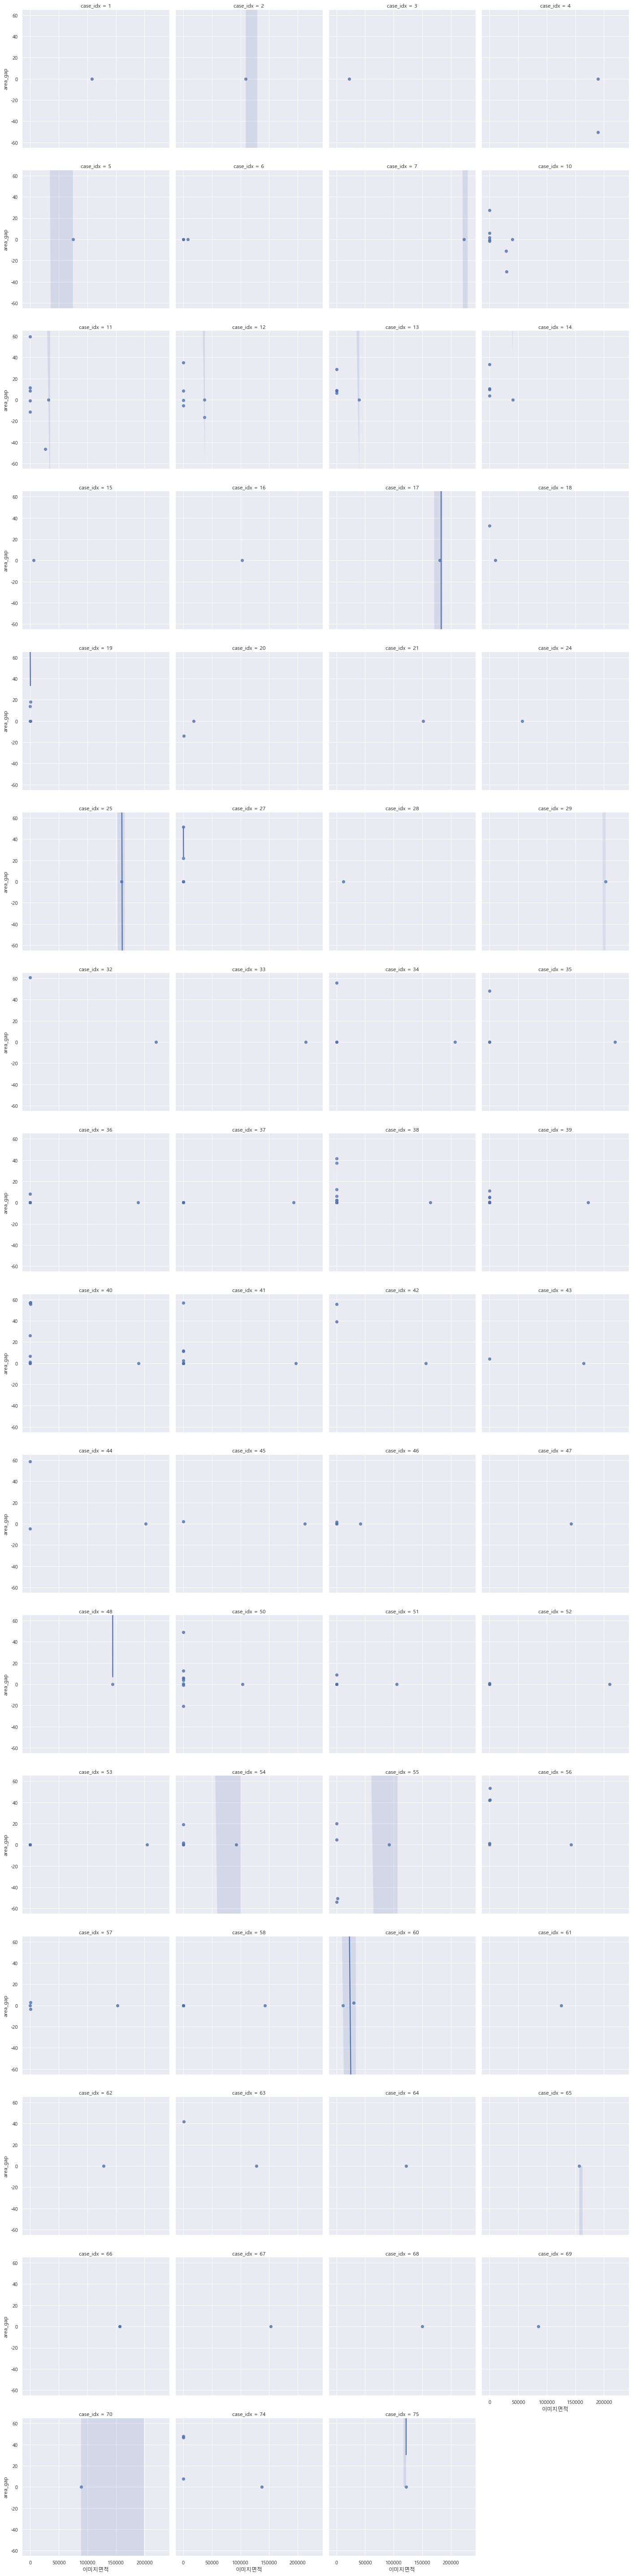

In [135]:
# x= 이미지 면적 y= weight_gap case_idx 별로 따로
g=sns.lmplot(x='이미지면적', y='area_gap',data=result,fit_reg=True,col='case_idx',
          col_wrap=4)
g.set(ylim=(-65,65))

